In [1]:
import pandas as pd
import glob


In [2]:
models=['AE',
 'VAE',
 'BETA',
 'VAE_LinNF',
 'VAE_IAF',
 'DBVAE',
 'IWVAE',
 'MIWAE',
 'CIWAE',
 'WAE',
 'INFOVAE',
 'VAMP',
 'SVAE',
 'PVAE',
 'VQVAE',
 'HVAE',
 'RAE_GP',
 'RHVAE']


In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,cohen_kappa_score
from tqdm import tqdm

#thresholds=[0.18,0.22,0.3]
columns=['difference_norm_readings','difference_norm_cycle','difference_norm_trend']
models=['AE',
 'VAE',
 'BETA',
 'VAE_LinNF',
 'VAE_IAF',
 'DBVAE',
 'IWVAE',
 'MIWAE',
 'CIWAE', 'WAE',
 'INFOVAE',
 'VAMP',
 'SVAE']
models=['AE',
 'VAE',
 'BETA',
 'VAE_LinNF']
models=['AE',
 'VAE',
 'BETA',
 'VAE_LinNF',
 'VAE_IAF',
 'DBVAE',
 'IWVAE',
 'MIWAE',
 'CIWAE',
 'WAE',
 'INFOVAE',
 'VAMP',
 'VQVAE',
 'HVAE',
 'RAE_GP',
 'RHVAE']
#models=["VAE"]
experiment="experiment_1"
building_df=pd.DataFrame()
buildings=["118","246","1245","1311","1141"]
pbar=tqdm(total=len(buildings))
start=1
for building in buildings:
    
    for model in models:
    
        #load all .csv files in experiment_1/csv/ into a single dataframe
        df = pd.concat([pd.read_csv(f) for f in glob.glob('experiment_1/csv/latent_dim_8/{}/building_{}*.csv'.format(model,building))], ignore_index = True)
        df_adjusted = df[df['filled'] == 0]
        
        if start==1:
            
            if start==1:
                column='difference_norm_readings'
                #error=df_adjusted[column]
                seuil=df_adjusted[column].mean()+3*df_adjusted[column].std()
                df_adjusted['anomaly_{}'.format(column)] = df_adjusted[column] > seuil
                df_adjusted['anomaly_{}'.format(column)] = df_adjusted['anomaly_{}'.format(column)].astype(int)
                
                x=df_adjusted['anomaly_{}'.format(column)]
                y=df_adjusted["anomalies"]
                precision=precision_score(y, x)
                recall=recall_score(y, x)
                f1=f1_score(y, x)
                accuracy=accuracy_score(y, x)
                kappa=cohen_kappa_score(y, x)
                #add a new line to the dataframe building_df that contains the metrics
                building_df=building_df.append({'building':building,'model':model,'precision':precision,'recall':recall,'f1':f1,'accuracy':accuracy,'kappa':kappa},ignore_index=True)
            
    pbar.update(1)
pbar.close()
building_df.to_csv('experiment_1/result/result_latent_8.csv',index=False)
                

  0%|          | 0/5 [00:00<?, ?it/s]/tmp/ipykernel_25074/3751402609.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  building_df=building_df.append({'building':building,'model':model,'precision':precision,'recall':recall,'f1':f1,'accuracy':accuracy,'kappa':kappa},ignore_index=True)
/tmp/ipykernel_25074/3751402609.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  building_df=building_df.append({'building':building,'model':model,'precision':precision,'recall':recall,'f1':f1,'accuracy':accuracy,'kappa':kappa},ignore_index=True)
/tmp/ipykernel_25074/3751402609.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  building_df=building_df.append({'building':building,'model':model,'precision':precision,'recall':recall,'f1':

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,cohen_kappa_score
from tqdm import tqdm
import os
#thresholds=[0.18,0.22,0.3]
columns=['difference_norm_readings','difference_norm_cycle','difference_norm_trend']
models=['AE',
 'VAE',
 'BETA',
 'VAE_LinNF',
 'VAE_IAF',
 'DBVAE',
 'IWVAE',
 'MIWAE',
 'CIWAE',
 'WAE',
 'INFOVAE',
 'VAMP',
 'SVAE',
 'PVAE',
 'VQVAE',
 'HVAE',
 'RAE_GP',
 'RHVAE']
#models=["WAE"]
experiment="experiment_2"

buildings=["118","246","1245","1311","1141"]
pbar=tqdm(total=len(buildings))
start=1
columns_cluster=["cycle","trend"]
for column_cluster in columns_cluster:
    building_df=pd.DataFrame()
    for building in buildings:
        
        for model in models:
        
            #load all .csv files in experiment_1/csv/ into a single dataframe
            df = pd.concat([pd.read_csv(f) for f in glob.glob('{}/csv/{}/latent_dim_16/{}/building_{}*.csv'.format(experiment,column_cluster,model,building))], ignore_index = True)
            df_adjusted = df[df['filled'] == 0]
            
            if start==1:
                
                if start==1:
                    column='difference_norm_readings'
                    #error=df_adjusted[column]
                    seuil=df_adjusted[column].mean()+3*df_adjusted[column].std()
                    df_adjusted['anomaly_{}'.format(column)] = df_adjusted[column] > seuil
                    df_adjusted['anomaly_{}'.format(column)] = df_adjusted['anomaly_{}'.format(column)].astype(int)
                    
                    x=df_adjusted['anomaly_{}'.format(column)]
                    y=df_adjusted["anomalies"]
                    precision=precision_score(y, x)
                    recall=recall_score(y, x)
                    f1=f1_score(y, x)
                    accuracy=accuracy_score(y, x)
                    kappa=cohen_kappa_score(y, x)
                    #add a new line to the dataframe building_df that contains the metrics
                    building_df=building_df.append({'building':building,'model':model,'precision':precision,'recall':recall,'f1':f1,'accuracy':accuracy,'kappa':kappa},ignore_index=True)
                
        pbar.update(1)
    pbar.close()
    if not(os.path.exists('{}/result/{}'.format(experiment,column_cluster))):
        os.makedirs('{}/result/{}'.format(experiment,column_cluster))
    building_df.to_csv('{}/result/{}/result_latent_16.csv'.format(experiment,column_cluster),index=False)

  0%|          | 0/5 [00:00<?, ?it/s]/tmp/ipykernel_3039646/913368881.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  building_df=building_df.append({'building':building,'model':model,'precision':precision,'recall':recall,'f1':f1,'accuracy':accuracy,'kappa':kappa},ignore_index=True)
/tmp/ipykernel_3039646/913368881.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  building_df=building_df.append({'building':building,'model':model,'precision':precision,'recall':recall,'f1':f1,'accuracy':accuracy,'kappa':kappa},ignore_index=True)
/tmp/ipykernel_3039646/913368881.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  building_df=building_df.append({'building':building,'model':model,'precision':precision,'recall':recall,'f

In [17]:
#import one class classification metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,cohen_kappa_score
#set the threshold for the anomaly detection as an array that has all values between 0.1 and 0.4
thresholds = [i/100 for i in range(10,50)]
precision = []
recall = []
f1 = []
accuracy = []
kappa = []
for seuil in thresholds:
    df_adjusted["label"]=df_adjusted["difference_norm_readings"].apply(lambda x: 1 if x>seuil else 0)
    x=df_adjusted["label"]
    y=df_adjusted["anomalies"]
    """
    print("Precision Score: ",precision_score(x,y,average="macro"))
    print("Recall Score: ",recall_score(x,y,average="macro"))
    print("F1 Score: ",f1_score(x,y,average="macro"))
    print("Accuracy Score: ",accuracy_score(x,y))
    print("Cohen Kappa Score: ",cohen_kappa_score(x,y))
    """
    precision.append(precision_score(x,y,average="macro"))
    recall.append(recall_score(x,y,average="macro"))    
    f1.append(f1_score(x,y,average="macro"))
    accuracy.append(accuracy_score(x,y))
    kappa.append(cohen_kappa_score(x,y))

/home/cynthia/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cynthia/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cynthia/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cynthia/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: Undefi

In [32]:
seuil=0.188
df_adjusted["label"]=df_adjusted["difference_norm_readings"].apply(lambda x: 1 if x>seuil else 0)
x=df_adjusted["label"]
y=df_adjusted["anomalies"]

print("Precision Score: ",precision_score(x,y,average="macro"))
print("Recall Score: ",recall_score(x,y,average="macro"))
print("F1 Score: ",f1_score(x,y,average="macro"))
print("Accuracy Score: ",accuracy_score(x,y))
print("Cohen Kappa Score: ",cohen_kappa_score(x,y))

Precision Score:  0.8377027327260609
Recall Score:  0.8265625
F1 Score:  0.8320020255074938
Accuracy Score:  0.9347222222222222
Cohen Kappa Score:  0.6640190627482129


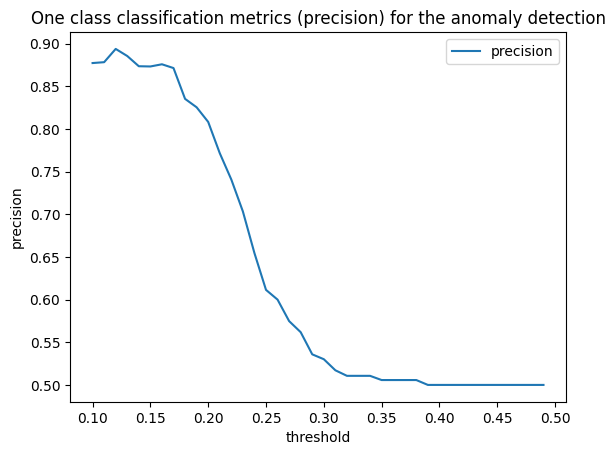

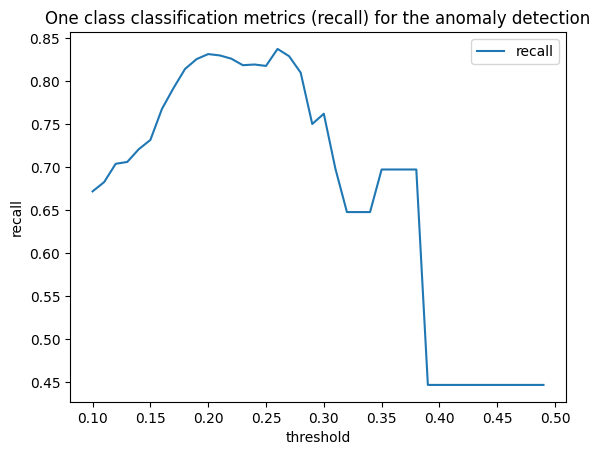

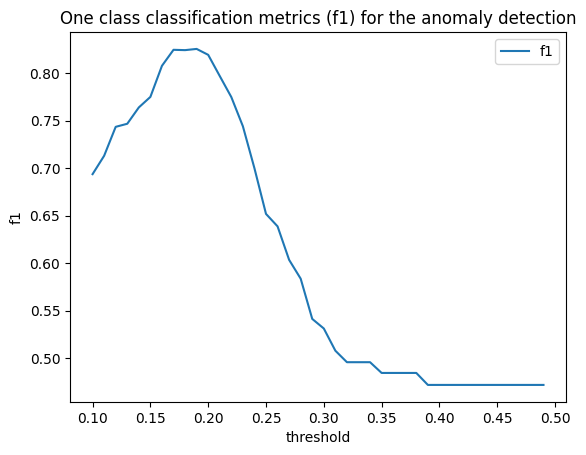

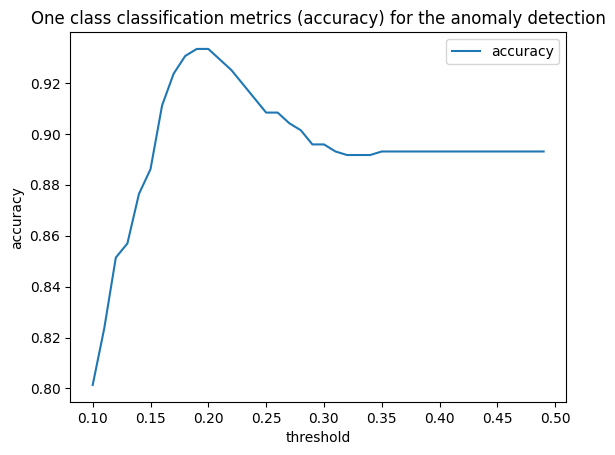

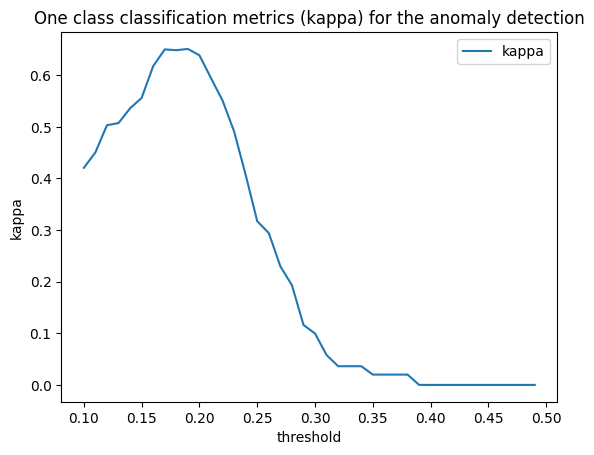

In [22]:
import matplotlib.pyplot as plt
import numpy as np
metrics=["precision","recall","f1","accuracy","kappa"]
metrics_eval={"precision":precision,"recall":recall,"f1":f1,"accuracy":accuracy,"kappa":kappa}

for metric in metrics:
    array=np.array(metrics_eval[metric])
    plt.plot(thresholds,array,label=metric)
    plt.legend()
    plt.xlabel("threshold")
    plt.ylabel(metric)
    plt.title("One class classification metrics ({}) for the anomaly detection".format(metric)  )
    plt.show()

In [7]:
df_anomalous=df_adjusted[df_adjusted["anomalies"]==1]
x=df_anomalous["label"]
y=df_anomalous["anomalies"]
print("Precision Score: ",precision_score(x,y,average="macro"))
print("Recall Score: ",recall_score(x,y,average="macro"))
print("F1 Score: ",f1_score(x,y,average="macro"))
print("Accuracy Score: ",accuracy_score(x,y))

Precision Score:  0.42857142857142855
Recall Score:  0.5
F1 Score:  0.4615384615384615
Accuracy Score:  0.8571428571428571


/home/cynthia/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
